In [4]:
import pandas as pd
import numpy as np
import os
import json
from collections import Counter

# 读取

In [5]:
all_df = pd.read_csv("../Pubmed_Bert/output/all_label.csv", index_col=0, header=0)

In [6]:
bpdf = all_df.loc[all_df["物种类别"]=="Bactology"]
mpdf = all_df.loc[all_df["物种类别"]=="Mycology"]
vpdf = all_df.loc[all_df["物种类别"]=="Virology"]

# 文献数量分布图

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

# 找一个画布
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 8))

# fig.suptitle("文献数量分布", fontsize=18)
plt.subplots_adjust(left=0.2, right=0.85, top=0.95, bottom=0.15, wspace=0.01, hspace=0.2)

# ax
ax = axes[0]
ax.grid(axis="y", linestyle="--")
bins = 100
ax.hist(bpdf["文献数量"], bins, width=1, color="#da9696", alpha = 1, label='细菌', density=True)
ax.axvline(bpdf["文献数量"].mean(), color="#da9696", linestyle='dashed', linewidth=2) # 平均值
ax.text(bpdf["文献数量"].mean()*1.2, 0.15, '平均文献数: {:.2f}'.format(bpdf["文献数量"].mean()), fontsize=12) # 标注平均值的数值

ax.tick_params(axis='x', labelsize=12)
ax.set_xlim((0, 100))
x_ticks = np.linspace(0, 100, 5)
ax.set_xticks(x_ticks)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim((0, 0.5))
# y_ticks = np.linspace(0, 0.5, 4)
# ax.set_yticks(y_ticks)
ax.legend(fontsize=12, loc=0, frameon=True, bbox_to_anchor=(1, 1))

# ax1
# ax1 = axes[1]
# ax1.grid(axis="y", linestyle="--")

# ax1.hist(mpdf["文献数量"], bins, width=1, color="#8eb3d1", alpha = 1, label='真菌', density=True)
# ax1.axvline(mpdf["文献数量"].mean(), color="#8eb3d1", linestyle='dashed', linewidth=2)
# ax1.text(mpdf["文献数量"].mean()*1.2, 0.15, '平均文献数: {:.2f}'.format(mpdf["文献数量"].mean()), fontsize=12) # 标注平均值的数值

# ax1.tick_params(axis='x', labelsize=12)
# ax1.set_xlim((0, 100))
# ax1.set_xticks(x_ticks)
# ax1.set_ylabel('物种频率', fontsize=16)
# ax1.set_ylim((0, 0.5))
# # ax1.set_yticks(y_ticks)

# ax1.tick_params(axis='y', labelsize=12)
# ax1.legend(fontsize=12, loc=0, frameon=True, bbox_to_anchor=(1, 1))

# # ax2
# ax2 = axes[2]
# ax2.grid(axis="y", linestyle="--")

# ax2.hist(vpdf["文献数量"], bins, width=1, color="#ffd58b", alpha = 1, label='病毒', density=True)
# ax2.axvline(vpdf["文献数量"].mean(), color="#ffd58b", linestyle='dashed', linewidth=2)
# ax2.text(vpdf["文献数量"].mean()*1.2, 0.15, '平均文献数: {:.2f}'.format(vpdf["文献数量"].mean()), fontsize=12) # 标注平均值的数值

# ax2.set_xlabel('文献数量', fontsize=16)
# ax2.tick_params(axis='x', labelsize=12)
# ax2.set_xlim((0, 100))
# ax2.set_xticks(x_ticks)
# ax2.tick_params(axis='y', labelsize=12)
# ax2.set_ylim((0, 0.5))
# # ax2.set_yticks(y_ticks)
# ax2.legend(fontsize=12, loc=0, frameon=True, bbox_to_anchor=(1, 1))

# save
# plt.savefig('plot/spec_paper_dist.svg', bbox_inches='tight')

# show
plt.show()

# 患者信息统计

## 患者性别

In [61]:
tdf = bdf.loc[bdf["性别"]!="none",:]
tpdf =pd.DataFrame([Counter(tdf["物种名称"]).keys(), Counter(tdf["物种名称"]).values()], index=["物种名称","文献数量"]).T
tpdf.index =tpdf["物种名称"]
tpdf1d = tpdf.loc[tpdf["文献数量"]<=1, ["文献数量"]]
tpdf1w = tpdf.loc[tpdf["文献数量"]>1, ["文献数量"]]

tpdf5d= tpdf1w.loc[tpdf1w["文献数量"]<=5, ["文献数量"]]
tpdf5w = tpdf1w.loc[tpdf1w["文献数量"]>5, ["文献数量"]]

tpdf10d = tpdf5w.loc[tpdf5w["文献数量"]>5, ["文献数量"]]
tpdf10w = tpdf5w.loc[tpdf5w["文献数量"]>10, ["文献数量"]]

tdf.index = tdf["物种名称"]
var_dict = {"bdf":tdf.loc[tpdf1d.index],"mdf":tdf.loc[tpdf5d.index], "vdf":tdf.loc[tpdf10d.index] }

In [69]:
var_dict = {"bdf":bdf.loc[bdf["性别"]!="none",:],"mdf":mdf.loc[mdf["性别"]!="none",:], "vdf":vdf.loc[vdf["性别"]!="none",:]}
for i in var_dict:
    locals()[i[0]+"pdf"] = pd.DataFrame([Counter(var_dict[i]["物种名称"]).keys(), Counter(var_dict[i]["物种名称"]).values()], index=["物种名称","文献数量"]).T

In [70]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["性别"]).keys(), Counter(var_dict[i]["性别"]).values()], index=["性别","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["性别"]

<ipython-input-71-b4d98a89655f>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


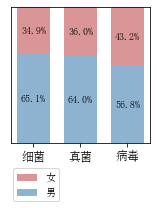

In [71]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'


results = {
    '细菌': [
        # bdf_info.loc["none","比例"],
        bdf_info.loc["男","比例"],bdf_info.loc["女","比例"]],
    '真菌': [
        # mdf_info.loc["none","比例"],
        mdf_info.loc["男","比例"],mdf_info.loc["女","比例"]],
    '病毒': [
        # vdf_info.loc["none","比例"],
        vdf_info.loc["男","比例"],vdf_info.loc["女","比例"]],
}
category_names = [ 
    # '缺失',
    '男','女']
category_colors = [
    # "#bebebe", 
    "#8eb3d1", "#da9696"]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(2.5, 2.5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.7,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15))

plt.savefig('plot/patient_sex.svg', bbox_inches='tight')

plt.show()



## 样本量

In [94]:
# var_dict = {"bdf":bdf.loc[bdf["样本量"]!="none",:],"mdf":mdf.loc[mdf["样本量"]!="none",:], "vdf":vdf.loc[vdf["样本量"]!="none",:]}
var_dict = {"bdf":bdf,"mdf":mdf, "vdf":vdf}

for i in var_dict:
    locals()[i[0]+"pdf"] = pd.DataFrame([Counter(var_dict[i]["物种名称"]).keys(), Counter(var_dict[i]["物种名称"]).values()], index=["物种名称","文献数量"]).T

In [95]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["样本量"]).keys(), Counter(var_dict[i]["样本量"]).values()], index=["样本量","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["样本量"]

<ipython-input-96-27a87f8d0951>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


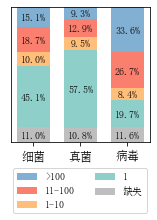

In [96]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

results = {
    '细菌': [
        # bdf_info.loc["none","比例"],
        bdf_info.loc["1","比例"],bdf_info.loc["1-10","比例"], bdf_info.loc["11-100","比例"], bdf_info.loc[">100","比例"]],
    '真菌': [
        # mdf_info.loc["none","比例"],
        mdf_info.loc["1","比例"],mdf_info.loc["1-10","比例"], mdf_info.loc["11-100","比例"], mdf_info.loc[">100","比例"]],
    '病毒': [
        # vdf_info.loc["none","比例"],
        vdf_info.loc["1","比例"],vdf_info.loc["1-10","比例"], vdf_info.loc["11-100","比例"], vdf_info.loc[">100","比例"]],
}
category_names = [ 
    # '缺失',
    '1','1-10', "11-100", ">100"]
category_colors = [
    # "#bebebe", 
    "#8ecfc9", "#ffbe7a", "#fa7f6f", "#82b0d2" ]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(2.5, 2.5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.7,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15), ncol=2)

plt.savefig('plot/patient_num.svg', bbox_inches='tight')

plt.show()


## 患者年龄

In [58]:
tdf = bdf.loc[bdf["年龄"]!="none",:]
tpdf =pd.DataFrame([Counter(tdf["物种名称"]).keys(), Counter(tdf["物种名称"]).values()], index=["物种名称","文献数量"]).T
tpdf.index =tpdf["物种名称"]
tpdf1d = tpdf.loc[tpdf["文献数量"]<=1, ["文献数量"]]
tpdf1w = tpdf.loc[tpdf["文献数量"]>1, ["文献数量"]]

tpdf5d= tpdf1w.loc[tpdf1w["文献数量"]<=5, ["文献数量"]]
tpdf5w = tpdf1w.loc[tpdf1w["文献数量"]>5, ["文献数量"]]

tpdf10d = tpdf5w.loc[tpdf5w["文献数量"]>5, ["文献数量"]]
tpdf10w = tpdf5w.loc[tpdf5w["文献数量"]>10, ["文献数量"]]

tdf.index = tdf["物种名称"]
var_dict = {"bdf":tdf.loc[tpdf1d.index],"mdf":tdf.loc[tpdf5d.index], "vdf":tdf.loc[tpdf10d.index] }

In [78]:
var_dict = {"bdf":bdf.loc[bdf["年龄"]!="none",:],"mdf":mdf.loc[mdf["年龄"]!="none",:], "vdf":vdf.loc[vdf["年龄"]!="none",:]}
for i in var_dict:
    locals()[i[0]+"pdf"] = pd.DataFrame([Counter(var_dict[i]["物种名称"]).keys(), Counter(var_dict[i]["物种名称"]).values()], index=["物种名称","文献数量"]).T

In [79]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["年龄"]).keys(), Counter(var_dict[i]["年龄"]).values()], index=["年龄","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["年龄"]

<ipython-input-80-61b5013d5f49>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


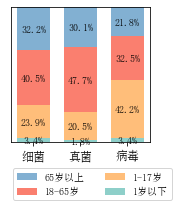

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'


results = {
    '细菌': [
        # bdf_info.loc["none","比例"],
        bdf_info.loc["1岁以下","比例"],bdf_info.loc["1-17岁","比例"], bdf_info.loc["18-65岁","比例"], bdf_info.loc["65岁以上","比例"]],
    '真菌': [
        # mdf_info.loc["none","比例"],
        mdf_info.loc["1岁以下","比例"],mdf_info.loc["1-17岁","比例"], mdf_info.loc["18-65岁","比例"], mdf_info.loc["65岁以上","比例"]],
    '病毒': [
        # vdf_info.loc["none","比例"],
        vdf_info.loc["1岁以下","比例"],vdf_info.loc["1-17岁","比例"], vdf_info.loc["18-65岁","比例"], vdf_info.loc["65岁以上","比例"]],
}
category_names = [ 
    # '缺失',
    '1岁以下','1-17岁', "18-65岁", "65岁以上"]
category_colors = [
    # "#bebebe", 
    "#8ecfc9", "#ffbe7a", "#fa7f6f", "#82b0d2" ]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(2.5, 2.5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.7,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15), ncol=2)

plt.savefig('plot/patient_age.svg', bbox_inches='tight')

plt.show()


# 免疫状态

In [32]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["免疫状态"]).keys(), Counter(var_dict[i]["免疫状态"]).values()], index=["免疫状态","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["免疫状态"]

<ipython-input-33-211fe9bc248d>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


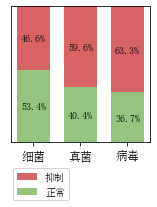

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

results = {
    '细菌': [bdf_info.loc["正常","比例"],bdf_info.loc["抑制","比例"]],
    '真菌': [mdf_info.loc["正常","比例"],mdf_info.loc["抑制","比例"]],
    '病毒': [vdf_info.loc["正常","比例"],vdf_info.loc["抑制","比例"]],
}
category_names = [ '正常',"抑制"]
category_colors = [ "#96c37d", "#d76364"]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(2.5, 2.5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.7,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15))

plt.savefig('plot/patient_immu.svg', bbox_inches='tight')

plt.show()


# 证据等级

In [48]:
tdf = bdf.loc[bdf["证据等级"]!="none",:]
tpdf =pd.DataFrame([Counter(tdf["物种名称"]).keys(), Counter(tdf["物种名称"]).values()], index=["物种名称","文献数量"]).T
tpdf.index =tpdf["物种名称"]
tpdf1d = tpdf.loc[tpdf["文献数量"]<=1, ["文献数量"]]
tpdf1w = tpdf.loc[tpdf["文献数量"]>1, ["文献数量"]]

tpdf5d= tpdf1w.loc[tpdf1w["文献数量"]<=5, ["文献数量"]]
tpdf5w = tpdf1w.loc[tpdf1w["文献数量"]>5, ["文献数量"]]

tpdf10d = tpdf5w.loc[tpdf5w["文献数量"]>5, ["文献数量"]]
tpdf10w = tpdf5w.loc[tpdf5w["文献数量"]>10, ["文献数量"]]

tdf.index = tdf["物种名称"]
var_dict = {"bdf":tdf.loc[tpdf1d.index],"mdf":tdf.loc[tpdf5d.index], "vdf":tdf.loc[tpdf10d.index] }

In [141]:
var_dict = {"bdf":bdf.loc[bdf["证据等级"]!="none",:],"mdf":mdf.loc[mdf["证据等级"]!="none",:], "vdf":vdf.loc[vdf["证据等级"]!="none",:]}
for i in var_dict:
    locals()[i[0]+"pdf"] = pd.DataFrame([Counter(var_dict[i]["物种名称"]).keys(), Counter(var_dict[i]["物种名称"]).values()], index=["物种名称","文献数量"]).T

In [76]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["证据等级"]).keys(), Counter(var_dict[i]["证据等级"]).values()], index=["证据等级","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["证据等级"]

<ipython-input-77-b880a54a2bbe>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels)


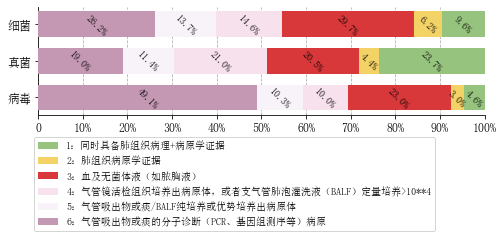

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

results = {
    '病毒': [
        # vdf_info.loc["none","比例"],
        vdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        vdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        vdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        vdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        vdf_info.loc["2：肺组织病原学证据","比例"],
        vdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
    '真菌': [
        # mdf_info.loc["none","比例"],
        mdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        mdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        mdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        mdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        mdf_info.loc["2：肺组织病原学证据","比例"],
        mdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
    '细菌': [
        # bdf_info.loc["none","比例"],
        bdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        bdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        bdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        bdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        bdf_info.loc["2：肺组织病原学证据","比例"],
        bdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
}
category_names = [ 
    # "缺失",
    "6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","5：气管吸出物或痰/BALF纯培养或优势培养出病原体",
    "4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","3：血及无菌体液（如脓胸液）",
    "2：肺组织病原学证据","1：同时具备肺组织病理+病原学证据"]

category_colors = [ 
    # "#bebebe",
    "#c497b2","#f8f3f9","#f7e1ed","#d8383a","#f3d266","#96c37d"]

# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(8, 2))
ax.grid(axis="x", linestyle="--", alpha=1, zorder=0)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.barh(labels, heights, left=starts, height=0.7,
            label=colname, color=color, zorder=50)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(x, y, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10, rotation=-45, zorder=100)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_yticklabels(labels=labels)

ax.set_xlim(0, 1)
x_ticklabels = ["0","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
x_ticks = np.linspace(0, 1, 11)
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels=x_ticklabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.savefig('plot/patient_evi.svg', bbox_inches='tight')

plt.show()

# 频率与免疫状态

C:\Users\xinzhuo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\xinzhuo\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


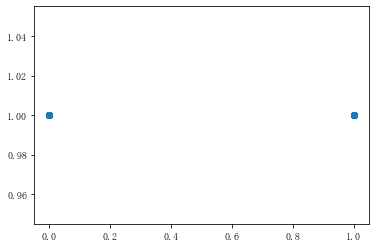

In [8]:
for i in var_dict:
    locals()[i[0]+"pdf"] = pd.DataFrame(
        [Counter(var_dict[i]["物种名称"]).keys(), Counter(var_dict[i]["物种名称"]).values()], index=["物种名称","文献数量"]).T
    immu_df = var_dict[i][["物种名称","免疫状态"]]
    immu_df.loc[immu_df["免疫状态"]=="正常","免疫状态"] = 1
    immu_df.loc[immu_df["免疫状态"]=="抑制","免疫状态"] = 0

    immu_f = []
    for j in locals()[i[0]+"pdf"]["物种名称"]:
        immu_f.append(np.mean(immu_df.loc[immu_df["物种名称"]==j, "免疫状态"]))
    locals()[i[0]+"pdf"]["免疫频率"] = immu_f
plt.scatter(bpdf["免疫频率"],bpdf["文献数量"] )


In [118]:
tdf = bdf.loc[bdf["免疫状态"]!="none",:]
tpdf =pd.DataFrame([Counter(tdf["物种名称"]).keys(), Counter(tdf["物种名称"]).values()], index=["物种名称","文献数量"]).T
tpdf.index =tpdf["物种名称"]
tpdf1d = tpdf.loc[tpdf["文献数量"]<=1, ["文献数量"]]
tpdf1w = tpdf.loc[tpdf["文献数量"]>1, ["文献数量"]]

tpdf5d= tpdf1w.loc[tpdf1w["文献数量"]<=5, ["文献数量"]]
tpdf5w = tpdf1w.loc[tpdf1w["文献数量"]>5, ["文献数量"]]

tpdf10w = tpdf5w.loc[tpdf5w["文献数量"]>10, ["文献数量"]]
tpdf10d = tpdf.loc[tpdf["文献数量"]<10, ["文献数量"]]
tpdf10w = tpdf.loc[tpdf["文献数量"]>10, ["文献数量"]]

tdf.index = tdf["物种名称"]
# var_dict = {"bdf":tdf.loc[tpdf1d.index],"mdf":tdf.loc[tpdf5d.index], "vdf":tdf.loc[tpdf10w.index] }
var_dict = {"bdf":tdf.loc[tpdf10d.index],"mdf":tdf.loc[tpdf10w.index] }

In [119]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["免疫状态"]).keys(), Counter(var_dict[i]["免疫状态"]).values()], index=["免疫状态","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["免疫状态"]

<ipython-input-120-8e11e3707365>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


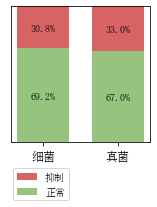

In [120]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

results = {
    '细菌': [bdf_info.loc["正常","比例"],bdf_info.loc["抑制","比例"]],
    '真菌': [mdf_info.loc["正常","比例"],mdf_info.loc["抑制","比例"]],
    # '病毒': [vdf_info.loc["正常","比例"],vdf_info.loc["抑制","比例"]],
}
category_names = [ '正常',"抑制"]
category_colors = [ "#96c37d", "#d76364"]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(2.5, 2.5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.7,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15))

plt.savefig('plot/patient_immu.svg', bbox_inches='tight')

plt.show()

# 频率与证据等级

In [144]:
tdf = bdf.loc[bdf["证据等级"]!="none",:]
tpdf =pd.DataFrame([Counter(tdf["物种名称"]).keys(), Counter(tdf["物种名称"]).values()], index=["物种名称","文献数量"]).T
tpdf.index =tpdf["物种名称"]

tpdf1d = tpdf.loc[tpdf["文献数量"]<=1, ["文献数量"]]
tpdf1w = tpdf.loc[tpdf["文献数量"]>1, ["文献数量"]]

tpdf5d= tpdf1w.loc[tpdf1w["文献数量"]<=5, ["文献数量"]]
tpdf5w = tpdf1w.loc[tpdf1w["文献数量"]>5, ["文献数量"]]

tpdf10w = tpdf5w.loc[tpdf5w["文献数量"]>10, ["文献数量"]]


tdf.index = tdf["物种名称"]
var_dict = {"bdf":tdf.loc[tpdf1d.index],"mdf":tdf.loc[tpdf5d.index], "vdf":tdf.loc[tpdf10w.index] }

# tpdf10d = tpdf.loc[tpdf["文献数量"]<10, ["文献数量"]]
# tpdf10w = tpdf.loc[tpdf["文献数量"]>10, ["文献数量"]]
# var_dict = {"bdf":tdf.loc[tpdf10d.index],"mdf":tdf.loc[tpdf10w.index] }

In [145]:
for i in var_dict:
    locals()[i+"_info"] = pd.DataFrame([Counter(var_dict[i]["证据等级"]).keys(), Counter(var_dict[i]["证据等级"]).values()], index=["证据等级","数量"]).T
    locals()[i+"_info"]["比例"] = locals()[i+"_info"]["数量"]/np.sum(locals()[i+"_info"]["数量"])
    locals()[i+"_info"].index = locals()[i+"_info"]["证据等级"]

<ipython-input-146-b880a54a2bbe>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels)


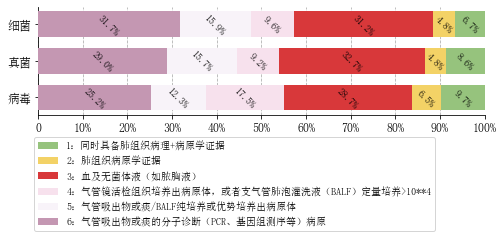

In [146]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'

results = {
    '病毒': [
        # vdf_info.loc["none","比例"],
        vdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        vdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        vdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        vdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        vdf_info.loc["2：肺组织病原学证据","比例"],
        vdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
    '真菌': [
        # mdf_info.loc["none","比例"],
        mdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        mdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        mdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        mdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        mdf_info.loc["2：肺组织病原学证据","比例"],
        mdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
    '细菌': [
        # bdf_info.loc["none","比例"],
        bdf_info.loc["6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","比例"],
        bdf_info.loc["5：气管吸出物或痰/BALF纯培养或优势培养出病原体","比例"],
        bdf_info.loc["4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","比例"],
        bdf_info.loc["3：血及无菌体液（如脓胸液）","比例"],
        bdf_info.loc["2：肺组织病原学证据","比例"],
        bdf_info.loc["1：同时具备肺组织病理+病原学证据","比例"]],
}
category_names = [ 
    # "缺失",
    "6：气管吸出物或痰的分子诊断（PCR、基因组测序等）病原","5：气管吸出物或痰/BALF纯培养或优势培养出病原体",
    "4：气管镜活检组织培养出病原体，或者支气管肺泡灌洗液（BALF）定量培养>10**4","3：血及无菌体液（如脓胸液）",
    "2：肺组织病原学证据","1：同时具备肺组织病理+病原学证据"]

category_colors = [ 
    # "#bebebe",
    "#c497b2","#f8f3f9","#f7e1ed","#d8383a","#f3d266","#96c37d"]

# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(8, 2))
ax.grid(axis="x", linestyle="--", alpha=1, zorder=0)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.barh(labels, heights, left=starts, height=0.7,
            label=colname, color=color, zorder=50)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(x, y, '{:.1%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=10, rotation=-45, zorder=100)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_yticklabels(labels=labels)

ax.set_xlim(0, 1)
x_ticklabels = ["0","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
x_ticks = np.linspace(0, 1, 11)
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels=x_ticklabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(-0.02, -0.15))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.savefig('plot/patient_evi.svg', bbox_inches='tight')

plt.show()